<a href="https://colab.research.google.com/github/Ronan552/Stocks/blob/main/Monte_Carlo_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


In [17]:
#set dates
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020,12,11)

#Get stock data
prices = web.DataReader('Dis', 'yahoo', start, end)['Close']



Date
2020-01-02    148.199997
2020-01-03    146.500000
2020-01-06    145.649994
2020-01-07    145.699997
2020-01-08    145.399994
                 ...    
2020-12-07    153.679993
2020-12-08    153.720001
2020-12-09    154.429993
2020-12-10    154.690002
2020-12-11    175.720001
Name: Close, Length: 240, dtype: float64

In [34]:
#calc daily returns
returns = prices.pct_change()
#get previous price
last_price = prices[-1]

In [33]:
#number of simulations
num_simulations = 1000
num_days = 252

simulation_df = pd.DataFrame()

for x in range(num_simulations):
  count = 0
  daily_vol = returns.std()

  price_series = []

  price = last_price * (1+ np.random.normal(0, daily_vol))
  price_series.append(price)

  
  for y in range(num_days):
    if count == 251:
      break
    price = price_series[count] * (1+ np.random.normal(0, daily_vol))
    price_series.append(price)
    count +=1

  simulation_df[x] = price_series


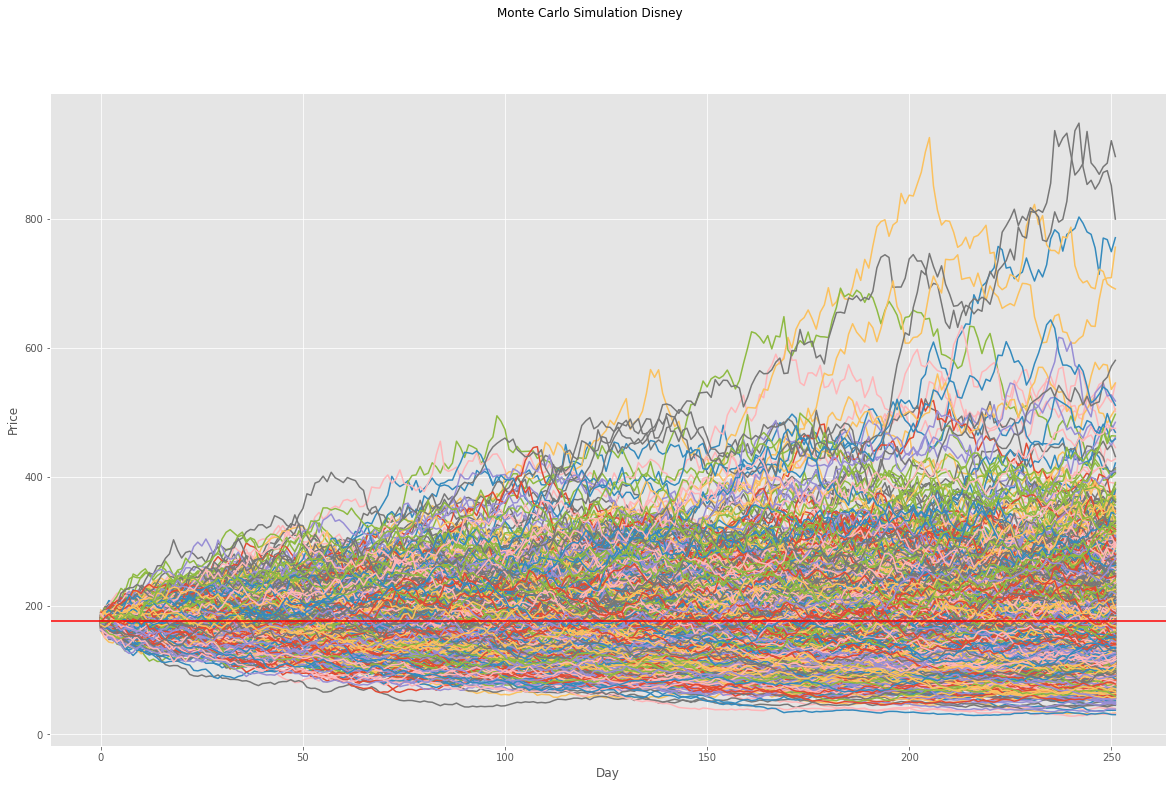

In [42]:

fig = plt.figure()
fig.suptitle('Monte Carlo Simulation Disney')
fig.set_size_inches(20,12)
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()